<a href="https://colab.research.google.com/github/migel-cepele/ComputerVision/blob/main/ImageSegmentationEx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

**Before starting:**

- Create a GitHub repository to upload the solution of this exercise.
- Share this GitHub link to your professor.

**Objectives**

Generate a single Python notebook implementing and answering the following questions:

🔹 **Task 1:** Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

🔹 **Task 2:** Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

🔹 **Task 3:** Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

🔹 **Task 4:** Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

**Task 1**

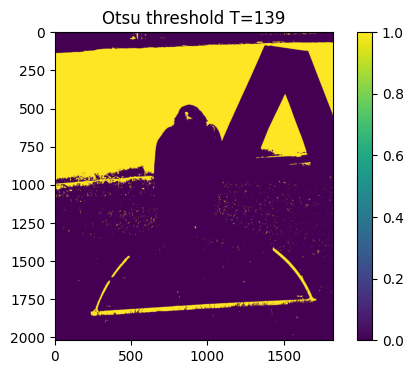

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import skimage as sk
from skimage.filters import threshold_otsu

ig = sk.data.eagle()
#sk.io.imshow(ig)


thresh = threshold_otsu(ig)
binary = ig > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()


**Task 2**
Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.

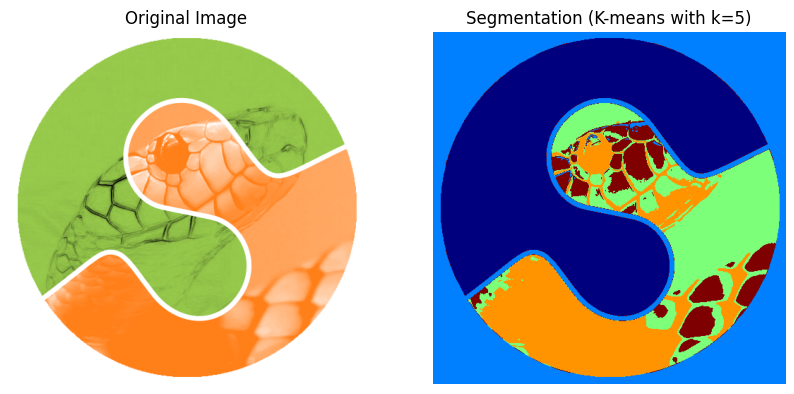

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

ig = sk.data.logo()
# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 5
v_I = np.reshape(ig,(ig.shape[0]*ig.shape[1],ig.shape[2])) # reshape image as NPIX x NCHANNELS array

kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)

I_kmeans = np.reshape(v_kmeans,(ig.shape[0],ig.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(ig, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.jet)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()


# we see that the image is segmented with different colors according to the number
# of supplied clusters. The quality of segmentation depends on the no of
# clusters and can be evaluated by a score like siluette score

**Task 3**
Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


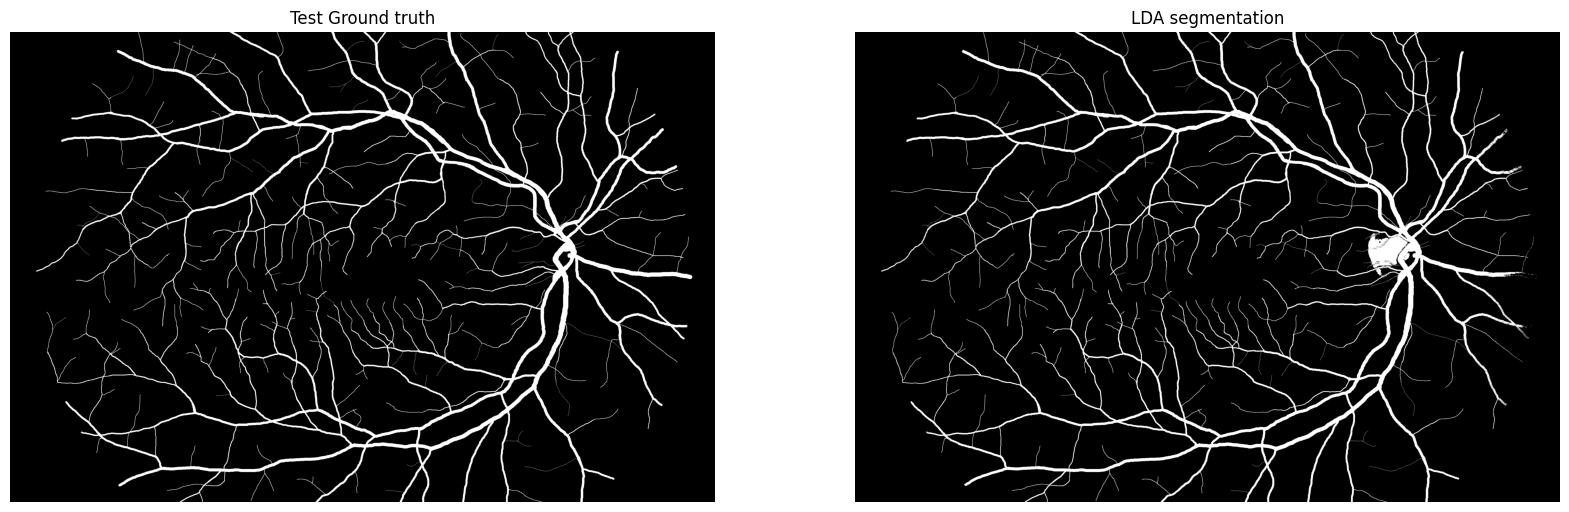

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os
from matplotlib import gridspec

# Path of the folder in your google drive unit where you have the images:

path = '/content/drive/MyDrive/CV_Tirana-main/M2_Image Segmentation/'

I_train = sk.io.imread(os.path.join(path,'vessels_train.jpg'))
I_train_GT = sk.io.imread(os.path.join(path,'vessels_train_GT.tif'))
I_test = sk.io.imread(os.path.join(path,'vessels_test.jpg'))
I_test_GT = sk.io.imread(os.path.join(path,'vessels_test_GT.tif'))

# reshape training image as 1d array:
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8)

v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool)

lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_train_GT.ravel()) # Train with training image and training Ground Truth

# Predict the test image:
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8)
v_lda = lda_model.predict(v_I_test)
I_lda = np.array(v_lda).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_lda, cmap=plt.cm.gray)
ax[1].set_title('LDA segmentation')
ax[1].set_axis_off()

plt.show()

**Another version of Task 3**

Training image shape: (8, 8)
Training GT shape: (8, 8)

Test image shape: (8, 8)
Test GT shape: (8, 8)


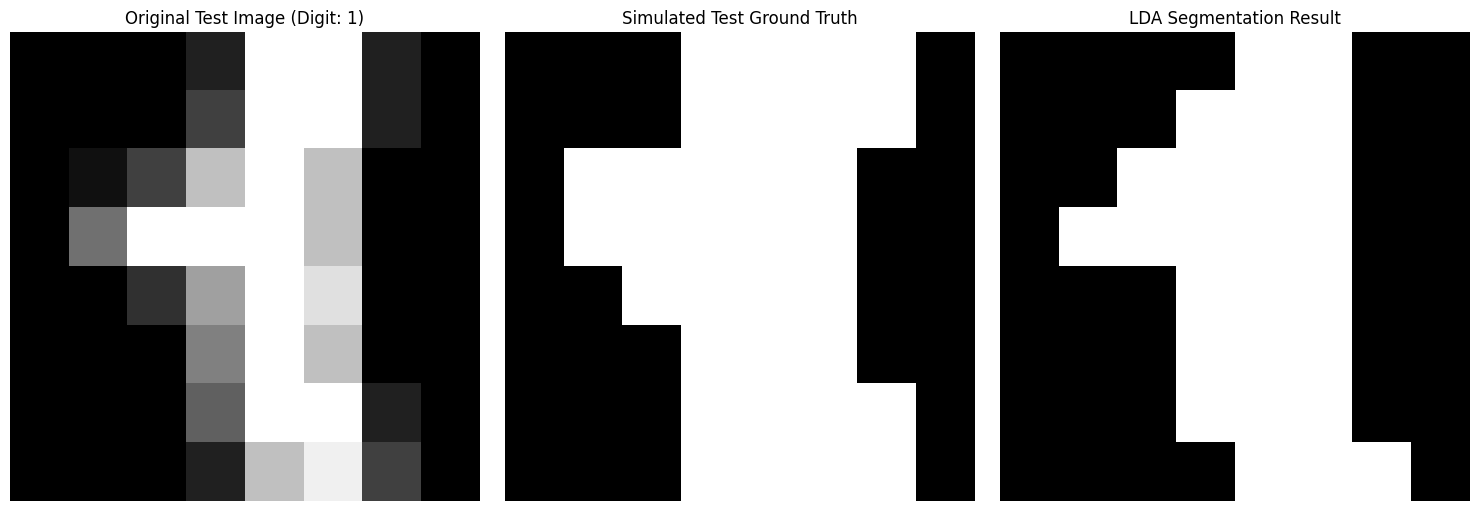

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits # To load the MNIST-like digits dataset
from skimage import img_as_float
from skimage.color import label2rgb # Useful for visualizing segmented regions


# This dataset contains 8x8 pixel images of handwritten digits.
digits = load_digits(n_class=2) # Load only digits 0 and 1 for a simpler binary case


# let's say we want to segment '0's from backgrounds (treating non-'0's as background for training).
# For true binary segmentation, we'll pick one image and create its "ground truth" manually.

# --- Prepare Training Data ---
# We'll use one image as 'training' data to define what 'background' and 'digit' pixels look like.
# Let's use the first digit (which is a '0') as our "training image".
train_image_idx = 0
I_train = digits.images[train_image_idx] # This is an 8x8 image
I_train_GT = (digits.target[train_image_idx] == digits.target[train_image_idx]).astype(bool) # Placeholder for now, we'll create actual GT

# For this example, let's just use a simple threshold for the GT of a single image
# as if we manually labeled it.
# All pixels that are not 0 (black) in the training image are considered 'digit'
I_train_GT = (I_train > 0.01).astype(bool) # Pixels with intensity > 0.01 are foreground (digit)

print(f"Training image shape: {I_train.shape}")
print(f"Training GT shape: {I_train_GT.shape}")

# Reshape training image and GT to 1D arrays of pixels
# Each pixel's intensity is our feature.
v_I_train = I_train.reshape(-1, 1).astype(float) # -1 infers the size, 1 for single feature
v_train_GT = I_train_GT.reshape(-1).astype(bool) # Flatten for LDA target

# --- Train LDA model ---
lda_model = LinearDiscriminantAnalysis(store_covariance=True)

lda_model.fit(v_I_train, v_train_GT) # Train with training image pixel intensities and ground truth labels


# --- Prepare Test Data and Predict ---
# Let's pick another image from the dataset for testing.
test_image_idx = 5 # Pick another digit (e.g., another '0' or a '1')
I_test = digits.images[test_image_idx]

# For a test image, we can also manually create a simple GT for comparison
I_test_GT = (I_test > 0.01).astype(bool) # Threshold the test image to simulate ground truth

print(f"\nTest image shape: {I_test.shape}")
print(f"Test GT shape: {I_test_GT.shape}")

# Reshape test image to 1D array of pixels
v_I_test = I_test.reshape(-1, 1).astype(float)

# Predict the segmentation using the trained LDA model
v_lda = lda_model.predict(v_I_test)
I_lda = v_lda.reshape(I_test.shape[0], I_test.shape[1]).astype(np.uint8) # Shape back result as image

# --- Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

# Original Test Image
ax[0].imshow(I_test, cmap=plt.cm.gray)
ax[0].set_title(f'Original Test Image (Digit: {digits.target[test_image_idx]})')
ax[0].set_axis_off()

# Test Ground Truth (simulated by thresholding)
ax[1].imshow(I_test_GT, cmap=plt.cm.gray)
ax[1].set_title('Simulated Test Ground Truth')
ax[1].set_axis_off()

# LDA Segmentation Result
# For better visualization, we can use label2rgb to color the segmented regions
# segmented_rgb = label2rgb(I_lda, image=I_test, bg_label=0, colors=['red']) # Red for foreground
ax[2].imshow(I_lda, cmap=plt.cm.gray) # Use grayscale for binary segmentation
ax[2].set_title('LDA Segmentation Result')
ax[2].set_axis_off()

plt.tight_layout()
plt.show()